In [1]:
import copy
import numpy as np 
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import networkx as nx
import string
import pandas as pd
import json
import random as rd
from scipy.stats import beta
from itertools import product
import pandas as pd
import sys
sys.path.insert(0, '..')
from simulator.fishbeliefs import *

In [6]:
# import copy
# import numpy as np 
# from abc import ABC, abstractmethod
# import matplotlib.pyplot as plt
# import networkx as nx
# import string
# import pandas as pd
# import json
# import random as rd
# from scipy.stats import beta
# from itertools import product

# class DBN(ABC):
#     @abstractmethod
#     def __init__(self, initial, transition):
#         pass
    
    
#     @abstractmethod
#     def step(self):
#         pass

    
# class FishBeliefNetwork(DBN):
#     def __init__(self, n_agents, edge_p, planet, edges=None, structure=None):  
#         self.t = 0
#         self.n_agents = n_agents
#         self.belief_history = []
#         self.sample_history = []
#         self.signal_history = []
#         self.param_history = []
#         self.true_prop_red = planet
#         self.structure = structure 
            
#         # Agent's prior is uniform, represented as a beta(1,1)
#         # The first element of the list is A's belief .
#         beliefs = np.array([[1,1] for _ in range(n_agents)], dtype='float64')
        
#         # Sample a fish for A 
#         sampled_fish = np.random.binomial(1, self.true_prop_red)   
#         beliefs[0] += update_beta_bernoulli(1, sampled_fish)
#         self.sample_history.append({"agent":0,"step":self.t,"sample":sampled_fish})
#         self.beliefs = beliefs
#         self.belief_history.append(beliefs)
        
        
#         if edges is not None:
#             self.edges = edges
#         else:
#             # Convention: A non-zero element A_ij indicates an edge from i to j.
#             edges = np.zeros((n_agents,n_agents)) 

#             # A is has incoming edges from all other nodes, 
#             # since A is a special case and integrates information from all other agents.
#             edges[:,0] = 1

#             # Sample other edges.
#             edges[1:n_agents,1:n_agents] = np.random.binomial(1, edge_p, (n_agents-1, n_agents-1))

#             # Make sure that self-edges do not exist. 
#             np.fill_diagonal(edges, 0)
#             self.edges = edges
        
#         # Check structure and determine t for sampling new fish. Influencer samples earlier. 
#         if self.structure == 'b->c':
#             sample_step_1 = 2
#             sample_step_2 = 5
#         elif self.structure == 'c->b':
#             sample_step_1 = 5
#             sample_step_2 = 2
#         elif self.structure == 'indep':
#             sample_step_1 = 2
#             sample_step_2 = 2
#         elif self.structure == 'b<->c':
#             sample_step_1 = 2
#             sample_step_2 = 2
#         self.sample_step_1 = sample_step_1
#         self.sample_step_2 = sample_step_2
        
#     def score_scale_fun(self, X, scores_old_min=0.0, scores_old_max=1/3, scores_new_min=0, scores_new_max=1):
#         # TRANSFORMS STRENGTH SCALE INTO 0-1 SCALE 
#         X = scores_new_max - ((scores_new_max - scores_new_min) * (scores_old_max - X) / (scores_old_max - scores_old_min))
#         return X
        
#     def step(self):
#         # Beliefs at t are deterministic copies of the beliefs at t-1.
#         new_beliefs = copy.deepcopy(self.beliefs)
        
#         # Sample new fish based on new sample fish
#         if self.t == self.sample_step_1:
#             new_beliefs[1] += update_beta_bernoulli(1, 0)
#             self.sample_history.append({"agent":1,"step":self.t,"sample":0})
#         if self.t == self.sample_step_2: 
#             new_beliefs[2] += update_beta_bernoulli(1, 1)
#             self.sample_history.append({"agent":2,"step":self.t,"sample":1})
        
            
#         signals = {}
#         parameters = {}
#         for i in range(self.n_agents): 
#             a = self.beliefs[i,0]
#             b = self.beliefs[i,1]
#             theta, _ = beta_mean_var(a,b) 
#             # NEW: messing around with the first trials to change the beliefs shown to subjects and make things more difficult
#             if self.t == 0:
#                 if theta >= 0.5: # first equal .5 -> red 
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
#             elif self.t == 1:
#                 if theta > 0.5: # then only red if larger than .5 
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
#             else:
#                 if theta >= 0.5:
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
            
#             # creating three different discrete strenghts based on three bins for a scale from 0-1
#             strength_discrete = 1
#             if self.score_scale_fun(strength) >= 1/3 and self.score_scale_fun(strength) < 2/3:
#                 strength_discrete = 2
#             elif self.score_scale_fun(strength) >= 2/3:
#                 strength_discrete = 3
            
#             signals[i] = {"belief":fish,"strength":strength,"strength_discrete": strength_discrete}
#             parameters[i] = {'a': a, 'b': b}
            
#             for j in range(self.n_agents):
#                 if self.edges[i,j] != 1:
#                     continue
#                 else:
#                     new_beliefs[j][int(np.abs(fish-1))] += strength 
                   
                    
#         self.beliefs = new_beliefs
#         self.belief_history.append(new_beliefs)
#         self.signal_history.append(signals)
#         self.param_history.append(parameters)
#         self.t += 1   
        
        
        
# class FishBeliefNetworkNaive(DBN):
#     def __init__(self, n_agents, edge_p, planet=None, edges=None, structure=None):  
#         self.t = 0
#         self.n_agents = n_agents
#         self.belief_history = []
#         self.sample_history = []
#         self.signal_history = []
#         self.param_history = []
#         self.structure = structure 
        
#         if planet is not None:
#             self.true_prop_red = planet
#         else:
#             if np.random.binomial(1,0.5) == 1:
#                 self.true_prop_red = 1/4.
#             else:
#                 self.true_prop_red = 3/4.
                
#         # Agent's prior is uniform, represented as a beta(1,1)
#         # The first element of the list is A's belief .
#         beliefs = np.array([[1,1] for _ in range(n_agents)], dtype='float64')
        
#         # Sample a fish for A 
#         sampled_fish = np.random.binomial(1, self.true_prop_red)   
#         beliefs[0] += update_beta_bernoulli(1, sampled_fish)
#         self.sample_history.append({"agent":0,"step":self.t,"sample":sampled_fish})
#         self.beliefs = beliefs
#         self.belief_history.append(beliefs)
        
        
#         if edges is not None:
#             self.edges = edges
#         else:
#             # Convention: A non-zero element A_ij indicates an edge from i to j.
#             edges = np.zeros((n_agents,n_agents)) 

#             # A is has incoming edges from all other nodes, 
#             # since A is a special case and integrates information from all other agents.
#             edges[:,0] = 1

#             # Sample other edges.
#             edges[1:n_agents,1:n_agents] = np.random.binomial(1, edge_p, (n_agents-1, n_agents-1))

#             # Make sure that self-edges do not exist. 
#             np.fill_diagonal(edges, 0)
#             self.edges = edges
            
#         # Sample time when B and C sample fish
#         # Note: Max number of steps hard-coded here
#         self.sample_step_1 = rd.randint(1,10)
#         self.sample_step_2 = rd.randint(1,10)
        
#     def score_scale_fun(self, X, scores_old_min=0.0, scores_old_max=1/3, scores_new_min=0, scores_new_max=1):
#         # TRANSFORMS STRENGTH SCALE INTO 0-1 SCALE 
#         X = scores_new_max - ((scores_new_max - scores_new_min) * (scores_old_max - X) / (scores_old_max - scores_old_min))
#         return X
        
#     def step(self):
#         # Beliefs at t are deterministic copies of the beliefs at t-1.
#         new_beliefs = copy.deepcopy(self.beliefs)
        
#         # Sample new fish based on new sample fish
#         if self.t == self.sample_step_1:
#             sampled_fish = np.random.binomial(1, self.true_prop_red)   
#             new_beliefs[1] += update_beta_bernoulli(1, sampled_fish)
#             self.sample_history.append({"agent":1,"step":self.t,"sample":sampled_fish})
#             if self.t == self.sample_step_2: 
#                 sampled_fish = np.random.binomial(1, self.true_prop_red)   
#                 new_beliefs[2] += update_beta_bernoulli(1, sampled_fish)
#                 self.sample_history.append({"agent":2,"step":self.t,"sample":sampled_fish})
        
#         elif self.t == self.sample_step_2:
#             sampled_fish = np.random.binomial(1, self.true_prop_red)   
#             new_beliefs[2] += update_beta_bernoulli(1, sampled_fish)
#             self.sample_history.append({"agent":2,"step":self.t,"sample":sampled_fish})
        
            
#         signals = {}
#         parameters = {}
#         for i in range(self.n_agents): 
#             a = self.beliefs[i,0]
#             b = self.beliefs[i,1]
#             theta, _ = beta_mean_var(a,b) 
#             # NEW: messing around with the first trials to change the beliefs shown to subjects and make things more difficult
#             if self.t == 0:
#                 if theta >= 0.5: # first equal .5 -> red 
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
#             elif self.t == 1:
#                 if theta > 0.5: # then only red if larger than .5 
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
#             else:
#                 if theta >= 0.5:
#                     fish = 1
#                     strength = (theta-0.5)*2
#                 else:
#                     fish = 0
#                     strength = np.abs((theta-0.5)*2) 
            
#             # creating three different discrete strenghts based on three bins for a scale from 0-1
#             strength_discrete = 1
#             if self.score_scale_fun(strength) >= 1/3 and self.score_scale_fun(strength) < 2/3:
#                 strength_discrete = 2
#             elif self.score_scale_fun(strength) >= 2/3:
#                 strength_discrete = 3
                
            
#             signals[i] = {"belief":fish,"strength":strength,"strength_discrete": strength_discrete}
#             parameters[i] = {'a': a, 'b': b}
                        
            
#             for j in range(self.n_agents):
#                 if self.edges[i,j] != 1:
#                     continue
#                 else:
#                     new_beliefs[j][int(np.abs(fish-1))] += strength 
                   
                    
#         self.beliefs = new_beliefs
#         self.belief_history.append(new_beliefs)
#         self.signal_history.append(signals)
#         self.param_history.append(parameters)
#         self.t += 1   
        
        


            
    
def update_beta_bernoulli(n, hits, mult_factor=1):
    n = n * mult_factor
    hits = hits * mult_factor
    return (hits, (n-hits))

        

def beta_mean_var(a,b):
    mean = a / (a+b)
    var = (a*b)/((a+b)**2 * (a+b+1))
    return mean, var

# STRUCTURES FOR NAIVE LEARNER 
structures = {"indep": np.array([[0., 0., 0.,0.],
                                       [1., 0., 0.,0.],
                                       [1., 0., 0.,0.],
                                        [0., 0., 0.,0.]]),
              "b->c": np.array([[0., 0., 0.,0.],
                                       [1., 0., 1.,0.],
                                       [1., 0., 0.,0.],
                                        [0., 0., 0.,0.]]),
              "c->b": np.array([[0., 0., 0.,0.],
                                       [1., 0., 0.,0.],
                                       [1., 1., 0.,0.],
                                        [0., 0., 0.,0.]]),
              "b<->c": np.array([[0., 0., 0.,0.],
                                       [1., 0., 1.,0.],
                                       [1., 1., 0.,0.],
                                        [0., 0., 0.,0.]]),
              "b<->c_echo": np.array([[0., 0., 0.,0.],
                                       [1., 0., 1.,0.],
                                       [1., 1., 0.,0.],
                                        [0., 0., 0.,0.]])
}

# STRUCTURES FOR ``LISTENING TO INFLUENCED AGENT ONLY''
structures_influenced = {"indep": np.array([[0., 0., 0.],
                                       [1., 0., 0.],
                                       [1., 0., 0.]]),
              "b->c": np.array([[0., 0., 0.],
                                         [0., 0., 1.],
                                         [1., 0., 0.]]),
              "c->b": np.array([[0., 0., 0.],
                                         [1., 0., 0.],
                                         [0., 1., 0.]]),
              "b<->c": np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]]),
              "b<->c_echo": np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]]) 
    
    
}


# STRUCTURES FOR ``LISTENING TO INFLUENCER ONLY'' 
structures_influencer = {"indep": np.array([[0., 0., 0.],
                                       [1., 0., 0.],
                                       [1., 0., 0.]]),
              "b->c": np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [0., 0., 0.]]),
              "c->b": np.array([[0., 0., 0.],
                                         [0., 0., 0.],
                                         [1., 1., 0.]]),
              "b<->c": np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]])    ,
               "b<->c_echo": np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]]) 
    
}


# # STRUCTURES FOR ``INITIAL FISH ONLY''
structures_init_fish = {"indep": np.array([[0., 0., 0.],
                                       [0., 0., 0.],
                                       [0., 0., 0.]]),
              "b->c": np.array([[0., 0., 0.],
                                         [0., 0., 1.],
                                         [0., 0., 0.]]),
              "c->b": np.array([[0., 0., 0.],
                                         [0., 0., 0.],
                                         [0., 1., 0.]]),
              "b<->c": np.array([[0., 0., 0.],
                                         [0., 0., 1.],
                                         [0., 1., 0.]]),
                        
              "b<->c_echo": np.array([[0., 0., 0.],
                                         [0., 0., 1.],
                                         [0., 1., 0.]]) 
    
}






def structure_names(array):
    if np.array_equal(array, np.array([[0., 0., 0.],
                                       [1., 0., 0.],
                                       [1., 0., 0.]])):
        struc = "indep"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 0., 0.]])):
        struc = "b->c"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 0.],
                                         [1., 1., 0.]])):
        struc = "c->b"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]])):
        struc = "b<->c"
        
    else:
        raise ValueError
    return struc



# Sample sequence for experiment

In [7]:
# Generate stimuli for pilot experiment
sequences = {}
parameters = {}
beliefs = {}
for k,e in structures.items():
    simulator = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges=e, structure=k)
    for _ in range(10):
        simulator.step()
    sequences[k] = simulator.signal_history    
    parameters[k] = simulator.param_history
    belief = simulator.belief_history
    belief = [i.tolist() for i in belief]
    beliefs[k] = belief
        

# created an additional txt for testing the new settings 
with open('naïve_stimuli.txt', 'w') as outfile:
    json.dump(sequences, outfile)
    
# also created a parameter txt that we need to use for getting likelihoods 
with open('naïve_mod_parameter.txt', 'w') as outfile:
    json.dump(parameters, outfile)
    
# also created a parameter txt that we need to use for getting likelihoods  
with open('naïve_mod_beliefs.txt', 'w') as outfile:
    json.dump(beliefs, outfile)




# sequences = {}
# parameters = {}
# beliefs = {}
# for k,e in structures_influenced.items():
#     simulator = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges=e, structure=k)
#     for _ in range(10):
#         simulator.step()
#     sequences[k] = simulator.signal_history    
#     parameters[k] = simulator.param_history
#     belief = simulator.belief_history
#     belief = [i.tolist() for i in belief]
#     beliefs[k] = belief


# # created an additional txt for testing the new settings 
# with open('influenced_stimuli.txt', 'w') as outfile:
#     json.dump(sequences, outfile)
    
# # also created a parameter txt that we need to use for getting likelihoods 
# with open('influenced_mod_parameter.txt', 'w') as outfile:
#     json.dump(parameters, outfile)

# # also created a parameter txt that we need to use for getting likelihoods 
# with open('influenced_mod_beliefs.txt', 'w') as outfile:
#     json.dump(beliefs, outfile)





    
# sequences = {}
# parameters = {}
# beliefs = {}
# for k,e in structures_influencer.items():
#     simulator = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges=e, structure=k)
#     for _ in range(10):
#         simulator.step()
#     sequences[k] = simulator.signal_history    
#     parameters[k] = simulator.param_history
#     belief = simulator.belief_history
#     belief = [i.tolist() for i in belief]
#     beliefs[k] = belief

# # created an additional txt for testing the new settings 
# with open('influencer_stimuli.txt', 'w') as outfile:
#     json.dump(sequences, outfile)
    
# # also created a parameter txt that we need to use for getting likelihoods 
# with open('influencer_mod_parameter.txt', 'w') as outfile:
#     json.dump(parameters, outfile)
    
# # also created a parameter txt that we need to use for getting likelihoods  
# with open('influencer_mod_beliefs.txt', 'w') as outfile:
#     json.dump(beliefs, outfile)



# sequences = {}
# parameters = {}
# beliefs = {}
# for k,e in structures_init_fish.items():
#     simulator = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges=e, structure=k)
#     for _ in range(10):
#         simulator.step()
#     sequences[k] = simulator.signal_history    
#     parameters[k] = simulator.param_history
#     belief = simulator.belief_history
#     belief = [i.tolist() for i in belief]
#     beliefs[k] = belief

# # created an additional txt for testing the new settings 
# with open('init_fish_stimuli.txt', 'w') as outfile:
#     json.dump(sequences, outfile)
    
# # also created a parameter txt that we need to use for getting likelihoods 
# with open('init_fish_mod_parameter.txt', 'w') as outfile:
#     json.dump(parameters, outfile)

# # also created a parameter txt that we need to use for getting likelihoods  
# with open('init_fish_mod_beliefs.txt', 'w') as outfile:
#     json.dump(beliefs, outfile)


[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
0 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
0 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
0 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
0 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
1 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
1 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
1 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
1 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
2 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
2 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
2 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
2 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
3 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
3 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]

 [0. 0. 0. 0.]]
3 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 3
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 0
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 1
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 2
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 3
[[0. 

 [0. 0. 0. 0.]]
2 3
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 0
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 1
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 2
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
3 3
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 0
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 1
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 2
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
0 3
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 0
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 1
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 2
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
1 3
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 0
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 1
[[0. 0. 0. 0.]
 [1. 0. 1. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]]
2 2
[[0. 

# Plot a single run

In [4]:
def plot_graph(sample):
    rows, cols = np.where(sample.edges == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    letters = string.ascii_uppercase
    assert sample.n_agents <= len(letters), "Too many nodes to label"
    labels = {i:letters[i] for i in range(sample.n_agents)}
    pos = nx.circular_layout(gr)
    nx.draw(gr, pos=pos, node_size=500, labels=labels, with_labels=True)
    plt.show()

In [5]:
sampler = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges = np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 0., 0.]]), structure='b->c')

for i in range(10):
    sampler.step()

print(sampler.belief_history)
for i in sampler.belief_history
sample = sampler

plot_graph(sample)

SyntaxError: invalid syntax (<ipython-input-5-aee78ccbaa6c>, line 9)

In [ ]:
# PLOTTING MODEL PREDICTIONS 
import pylab

plot_params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'19',
         'xtick.labelsize':'x-large',
          'font.family': 'Arial',
          'xtick.color':'dimgrey',
          'ytick.color':'dimgrey',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(plot_params)


data = np.array(sample.belief_history)
print(data)


df = {}
for agent in range(data.shape[1]):
    mean = []
    var = []
    for e in data[:,agent,:]:
        m,v = beta_mean_var(e[0],e[1])
        mean.append(m)
        var.append(v)
    df[str(agent) + "_mean"] = mean
    #df[str(agent) + "_var"] = var

df = pd.DataFrame(df)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

ax.plot(np.arange(0, 11,1), df["0_mean"], label="Agent A Mean");
ax.plot(np.arange(0, 11,1), df["1_mean"], label="Agent B Mean");
ax.plot(np.arange(0, 11,1), df["2_mean"], label="Agent C Mean");

ax.set_xlabel('Number of observations')
ax.set_ylabel('Mean belief, 1 is red')
ax.set_ylim([0, 1])

ax.legend(loc='upper right')
ax.grid(True, ls='--')
plt.axhline(0.5, color='red', linestyle="dotted")
plt.title("Indep; Initial:()")
plt.show()

# Multiple runs

In [ ]:
sampler_runs = []
for _ in range(1000):
    run = FishBeliefNetwork(n_agents=3, edge_p=1/3., planet=1., edges = np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 0., 0.]]), structure='b->c')
    for i in range(10):
        run.step()
    sampler_runs.append(run)

In [ ]:
def structure_names(array):
    if np.array_equal(array, np.array([[0., 0., 0.],
                                       [1., 0., 0.],
                                       [1., 0., 0.]])):
        struc = "indep"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 0., 0.]])):
        struc = "b->c"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 0.],
                                         [1., 1., 0.]])):
        struc = "c->b"
        
    elif np.array_equal(array, np.array([[0., 0., 0.],
                                         [1., 0., 1.],
                                         [1., 1., 0.]])):
        struc = "b<->c"
        
    else:
        raise ValueError
    return struc


                

In [ ]:
structures = {"indep":[],
              "b->c":[],
              "c->b":[],
              "b<->c":[]}

for run in sampler_runs:
    s = structure_names(run.edges)
    structures[s].append(run.belief_history)
structures = {k:np.array(v) for k,v in structures.items()}

In [ ]:
s = "b<->c"
df = {}
for agent in range(structures[s].shape[2]):
    mm = []
    for sample in range(structures[s].shape[0]):
        mean = []
        for e in structures[s][sample,:,agent,:]:
            assert e.shape == (2,)
            m,v = beta_mean_var(e[0],e[1])
            mean.append(m)
        mm.append(mean)
    df[str(agent) + "_mean"] = np.mean(np.array(mm), axis=0)
df = pd.DataFrame(df)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111)

ax.plot(np.arange(0, 11,1), df["0_mean"], label="Agent A Mean");
ax.plot(np.arange(0, 11,1), df["1_mean"], label="Agent B Mean");
ax.plot(np.arange(0, 11,1), df["2_mean"], label="Agent C Mean");

ax.set_xlabel('Number of observations')
ax.set_ylabel('Mean belief, 1 is red')
ax.set_ylim([0, 1])

ax.legend(loc='upper right')
ax.grid(True, ls='--')
plt.axhline(0.5, color='red', linestyle="dotted")
plt.title("Averaged beliefs over time")
plt.show()

In [ ]:
# transform scale and discretize strength 
def score_scale_fun(X, scores_old_min=0.0, scores_old_max=1/3, scores_new_min=0, scores_new_max=1):
    X = scores_new_max - ((scores_new_max - scores_new_min) * (scores_old_max - X) / (scores_old_max - scores_old_min))
    return X

strengths_rescaled = {}
all_strengths = []


for structure in sequences:
    trial = []
    for sequence in sequences[structure]:
        sequ_dict = {}
        sequ_dict['0'] = score_scale_fun(sequence[0]['strength'])
        sequ_dict['1'] = score_scale_fun(sequence[1]['strength'])
        sequ_dict['2'] = score_scale_fun(sequence[2]['strength'])
        all_strengths.append(score_scale_fun(sequence[0]['strength']))
        all_strengths.append(score_scale_fun(sequence[1]['strength']))
        all_strengths.append(score_scale_fun(sequence[2]['strength']))
        
        trial.append(sequ_dict)
    strengths_rescaled[structure] = trial
        
trial = 0
for strength in strengths_rescaled['b->c']:
    print('--------'+ str(trial) +'--------------')
    print(strength['2'])
    trial+=1


(array([33.,  7., 10., 15.,  3., 46.,  1.,  1.,  2.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

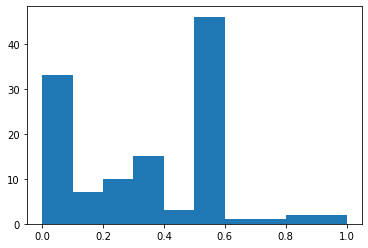

In [46]:
plt.hist(all_strengths)

In [11]:

mod_beliefs = open('naïve_stimuli.txt')
mod_beliefs = json.load(mod_beliefs)



for i in mod_beliefs['c->b']:
    print(i['0'])
    


{'belief': 1, 'strength': 0.25, 'strength_discrete': 2}
{'belief': 1, 'strength': 0.25, 'strength_discrete': 2}
{'belief': 1, 'strength': 0.25, 'strength_discrete': 2}
{'belief': 1, 'strength': 0.25, 'strength_discrete': 2}
{'belief': 1, 'strength': 0.2897758961865714, 'strength_discrete': 3}
{'belief': 1, 'strength': 0.33270709019146216, 'strength_discrete': 3}
{'belief': 1, 'strength': 0.3729030250403287, 'strength_discrete': 3}
{'belief': 1, 'strength': 0.3843983103940265, 'strength_discrete': 3}
{'belief': 1, 'strength': 0.40248881116379853, 'strength_discrete': 3}
{'belief': 1, 'strength': 0.4206951631858995, 'strength_discrete': 3}


In [10]:
betacdf = beta(1,2).cdf 
strength = (betacdf(0.5) - 0.5) 
print(strength)


betacdf = beta(1,1.25).cdf 
strength += (betacdf(0.5) - 0.5) 
print((betacdf(0.5) - 0.5) )
print(strength)


0.25
0.0795517923731428
0.3295517923731428


In [26]:
(.25)/4 


0.0625